## Tracking the following properties

- Number of conflicts pre solver
  - Distribution pos/edge/path
- Number of conflicts post solver
  - Distribution of pos/edge/path conflicts
  - Distribution of pos/edge/path *unsolveable* conflicts
- Solving time
  - A* total time
  - Fixing conflicts total time
  - Overall total time
- Maxmimum length of an agent path pre solver
- Maximum length of an agent path post solver
- Number of retries total
  - Distribution pos/edge/path

#### Warehouse Map - done
```bash
python combined_solver.py -s warehouse-10-20-10-2-2-even-1.scen -n 100 -t 900
python combined_solver.py -s warehouse-10-20-10-2-2-random-1.scen -n 100 -t 900
```

#### Room Map - done
```bash
python combined_solver.py -s room-64-64-16-even-2.scen -n 100 -t 900
python combined_solver.py -s room-64-64-16-random-9.scen -n 100 -t 900
```

#### Random Map
```bash
python combined_solver.py -s random-64-64-10-even-10.scen -n 100 -t 900
python combined_solver.py -s random-64-64-10-random-24.scen -n 100 -t 900
```

#### Maze Map
```bash
python combined_solver.py -s maze-128-128-10-even-20.scen -n 100 -t 900
python combined_solver.py -s maze-128-128-10-random-4.scen -n 100 -t 900
```

#### City Map
```bash
python combined_solver.py -s Paris_1_256-even-9.scen -n 100 -t 900
python combined_solver.py -s Paris_1_256-random-1.scen -n 100 -t 900
```

#### Empty Map
```bash
python combined_solver.py -s empty-48-48-even-13.scen -n 100 -t 900
python combined_solver.py -s empty-48-48-random-19.scen -n 100 -t 900
```

In [2]:
import pandas as pd
import re

def parse_mapf_log(log_path):
    with open(log_path, 'r', encoding='utf-8') as file:
        log_content = file.read()
    
    # Initialize variables to store extracted data
    data = {
        "scenario_file": "",
        "percentage_agents": 0,
        "conflicts_pre_solver": 0,
        "pos_conflicts_pre": 0,
        "edge_conflicts_pre": 0,
        "path_conflicts_pre": 0,
        "conflicts_post_solver": 0,
        "pos_conflicts_post": 0,
        "edge_conflicts_post": 0,
        "path_conflicts_post": 0,
        "unsolveable_pos_conflicts": 0,
        "unsolveable_edge_conflicts": 0,
        "unsolveable_path_conflicts": 0,
        "a_star_time": 0.0,
        "fixing_time": 0.0,
        "total_runtime": 0.0,
        "max_path_length_pre": 0,
        "max_path_length_post": 0,
        "total_retries": 0,
        "pos_retries": 0,
        "edge_retries": 0,
        "path_retries": 0
    }
    
    # Extract scenario file name and percentage agents
    if match := re.search(r"Arguments received: Namespace\(.*?scen_file='([^']+)'.*?percentage_agents=(\d+)", log_content):
        data["scenario_file"] = match.group(1)
        data["percentage_agents"] = int(match.group(2))
    
    # Extract initial conflicts
    if match := re.search(r"Initial conflicts identified: (\d+)", log_content):
        data["conflicts_pre_solver"] = int(match.group(1))
    
    if match := re.search(r"Initial number of position conflicts: (\d+)", log_content):
        data["pos_conflicts_pre"] = int(match.group(1))
    
    if match := re.search(r"Initial number of edge conflicts: (\d+)", log_content):
        data["edge_conflicts_pre"] = int(match.group(1))
    
    if match := re.search(r"Initial number of path conflicts: (\d+)", log_content):
        data["path_conflicts_pre"] = int(match.group(1))
    
    # Extract path lengths
    if match := re.search(r"Maximum agent path legnth after non-optimal solver: (\d+)", log_content):
        data["max_path_length_pre"] = int(match.group(1))
    
    if match := re.search(r"Maximum agent path legnth after optimal solver: (\d+)", log_content):
        data["max_path_length_post"] = int(match.group(1))
    
    # Extract runtime metrics
    if match := re.search(r"Fixing conflicts took ([\d.]+)", log_content):
        data["fixing_time"] = float(match.group(1))
    
    if match := re.search(r"Total combined solver runtime is ([\d.]+)", log_content):
        data["total_runtime"] = float(match.group(1))
    
    if match := re.search(r"Non-optimal solver took ([\d.]+)", log_content):
        data["a_star_time"] = float(match.group(1))
    
    # Extract post-solver conflicts
    if match := re.search(r"Number of conflicts at termination: (\d+)", log_content):
        data["conflicts_post_solver"] = int(match.group(1))
    
    if match := re.search(r"Number of position conflicts post solver: (\d+)", log_content):
        data["pos_conflicts_post"] = int(match.group(1))
    
    if match := re.search(r"Number of edge conflicts post solver: (\d+)", log_content):
        data["edge_conflicts_post"] = int(match.group(1))
    
    if match := re.search(r"Number of path conflicts post solver: (\d+)", log_content):
        data["path_conflicts_post"] = int(match.group(1))
    
    # Extract unsolvable conflicts
    if match := re.search(r"Number of 'unsolveable' position conflicts post solver: (\d+)", log_content):
        data["unsolveable_pos_conflicts"] = int(match.group(1))
    
    if match := re.search(r"Number of 'unsolveable' edge conflicts post solver: (\d+)", log_content):
        data["unsolveable_edge_conflicts"] = int(match.group(1))
    
    if match := re.search(r"Number of 'unsolveable' path conflicts post solver: (\d+)", log_content):
        data["unsolveable_path_conflicts"] = int(match.group(1))
    
    # Count retries
    pos_retries = len(re.findall(r"Retrying conflict \{ position", log_content))
    edge_retries = len(re.findall(r"Retrying conflict \{ edge", log_content))
    path_retries = len(re.findall(r"Retrying conflict \{ path", log_content))
    
    data["pos_retries"] = pos_retries
    data["edge_retries"] = edge_retries
    data["path_retries"] = path_retries
    data["total_retries"] = pos_retries + edge_retries + path_retries
    
    # Create a DataFrame from the collected data
    df = pd.DataFrame([data])
    return df

In [3]:
df_even_100 = parse_mapf_log("./logs/warehouse/even/100/mapf_solver.log")
df_even_200 = parse_mapf_log("./logs/warehouse/even/200/mapf_solver.log")
df_even_300 = parse_mapf_log("./logs/warehouse/even/300/mapf_solver.log")
df_even_400 = parse_mapf_log("./logs/warehouse/even/400/mapf_solver.log")
df_even_500 = parse_mapf_log("./logs/warehouse/even/500/mapf_solver.log")
df_even = pd.concat([df_even_100, df_even_200, df_even_300, df_even_400, df_even_500])

df_random_100 = parse_mapf_log("./logs/warehouse/random/100/mapf_solver.log")
df_random_200 = parse_mapf_log("./logs/warehouse/random/200/mapf_solver.log")
df_random_300 = parse_mapf_log("./logs/warehouse/random/300/mapf_solver.log")
df_random_400 = parse_mapf_log("./logs/warehouse/random/400/mapf_solver.log")
df_random_500 = parse_mapf_log("./logs/warehouse/random/500/mapf_solver.log")
df_random = pd.concat([df_random_100, df_random_200, df_random_300, df_random_400, df_random_500])

In [4]:
df_even.to_csv('./logs/warehouse/even/results_df.csv')
df_random.to_csv('./logs/warehouse/random/results_df.csv')

In [5]:
import matplotlib.pyplot as plt

def plot_conflicts_over_time(filename: str, title: str, save_path: str):
    df = pd.read_csv(filename, index_col=0)

    colors = {
        "Position": "blue",
        "Edge": "red",
        "Path": "green",
        "Total": "orange"
    }
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['Position'], label='Position Conflicts', linestyle='-', color=colors["Position"])
    plt.plot(df.index, df['Edge'], label='Edge Conflicts', linestyle='--', color=colors["Edge"])
    plt.plot(df.index, df['Path'], label='Path Conflicts', linestyle='-.', color=colors["Path"])
    plt.plot(df.index, df['Total'], label='Total Conflicts', linestyle=':', color=colors["Total"])

    # Formatting
    plt.xlabel('Time Step')
    plt.ylabel('Number of Conflicts')
    plt.title(title)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Save the plot
    plt.savefig(save_path)
    plt.show()

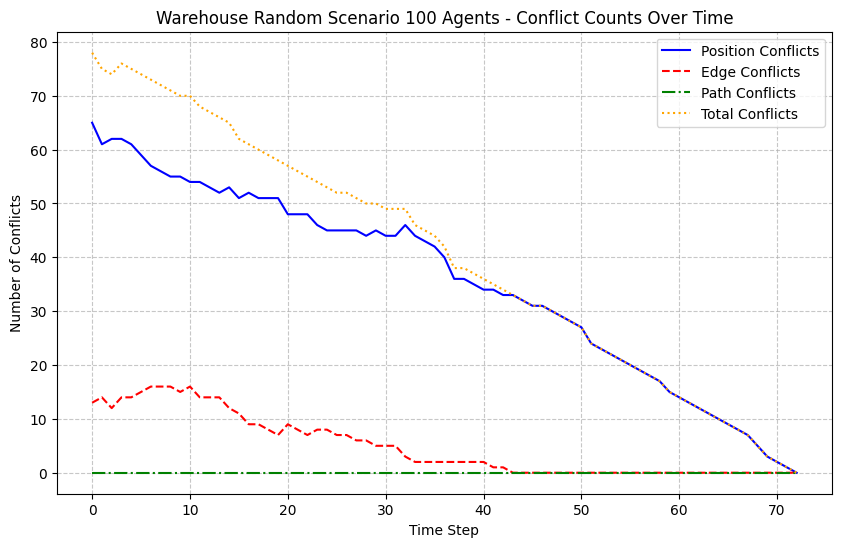

In [15]:
# Example usage with the uploaded file

file_path = "./logs/warehouse/random/100/conflict_counts_df.csv"
output_filepath = "./logs/warehouse/random/100/conflict_counts_plot_warehouse_random_100.png"
plot_conflicts_over_time(file_path, "Warehouse Random Scenario 100 Agents - Conflict Counts Over Time", output_filepath)

Make like a line? graph for tracking position, edge, path and total conflicts over time.

In [60]:
df = pd.read_csv("logs/warehouse/random/results_df.csv")

In [61]:
df_selected = df[['total_retries', 'pos_retries', 'edge_retries', 'path_retries']]

In [42]:
df.columns

Index(['Unnamed: 0', 'scenario_file', 'percentage_agents',
       'conflicts_pre_solver', 'pos_conflicts_pre', 'edge_conflicts_pre',
       'path_conflicts_pre', 'conflicts_post_solver', 'pos_conflicts_post',
       'edge_conflicts_post', 'path_conflicts_post',
       'unsolveable_pos_conflicts', 'unsolveable_edge_conflicts',
       'unsolveable_path_conflicts', 'a_star_time', 'fixing_time',
       'total_runtime', 'max_path_length_pre', 'max_path_length_post',
       'total_retries', 'pos_retries', 'edge_retries', 'path_retries'],
      dtype='object')

In [62]:
df_selected

,total_retries,pos_retries,edge_retries,path_retries
0,94,79,15,0
1,335,255,75,5
2,760,498,241,21
3,1032,652,347,33
4,788,492,268,28
